<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 49.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826129 sha256=a7274d619a8c0ff9faf3d0620998b18be6a0c20beaa2bac9457c58120af4a865
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436735 sha256=b11efa8e81db6290192ed42e1303b83a571f9b7b163645e60a1c11b218f82e2a
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [22]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute15", count=500)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                           open        high         low       close  \
2023-04-20 12:15:00  38196000.0  38300000.0  38183000.0  38281000.0   
2023-04-20 12:30:00  38282000.0  38349000.0  38265000.0  38308000.0   
2023-04-20 12:45:00  38309000.0  38408000.0  38304000.0  38339000.0   
2023-04-20 13:00:00  38338000.0  38500000.0  38333000.0  38450000.0   
2023-04-20 13:15:00  38450000.0  38478000.0  38402000.0  38454000.0   
...                         ...         ...         ...         ...   
2023-04-25 22:00:00  36692000.0  36725000.0  36649000.0  36724000.0   
2023-04-25 22:15:00  36724000.0  36776000.0  36697000.0  36722000.0   
2023-04-25 22:30:00  36721000.0  36782000.0  36615000.0  36700000.0   
2023-04-25 22:45:00  36679000.0  36699000.0  36614000.0  36620000.0   
2023-04-25 23:00:00  36620000.0  36695000.0  36600000.0  36601000.0   

                        volume         value  
2023-04-20 12:15:00  63.013152  2.410869e+09  
2023-04-20 12:30:00  44.835318  1.717361e+09  
2023-0

In [23]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-20 12:15:00,38281000.0
1,2023-04-20 12:30:00,38308000.0
2,2023-04-20 12:45:00,38339000.0
3,2023-04-20 13:00:00,38450000.0
4,2023-04-20 13:15:00,38454000.0
...,...,...
495,2023-04-25 22:00:00,36724000.0
496,2023-04-25 22:15:00,36722000.0
497,2023-04-25 22:30:00,36700000.0
498,2023-04-25 22:45:00,36620000.0


In [24]:
#prophet 불러옴
from fbprophet import Prophet

In [25]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [26]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=8, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


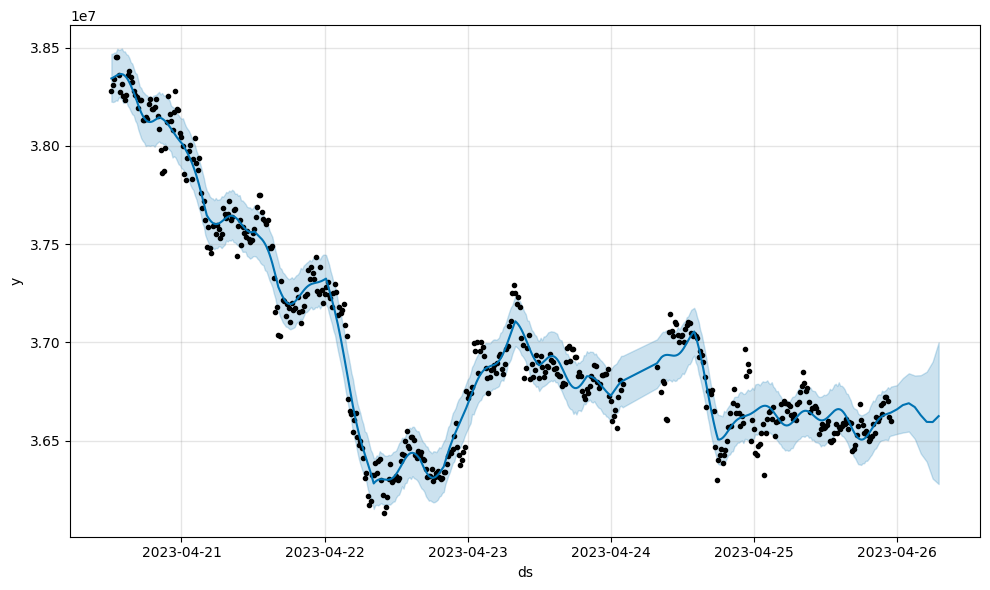

In [27]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


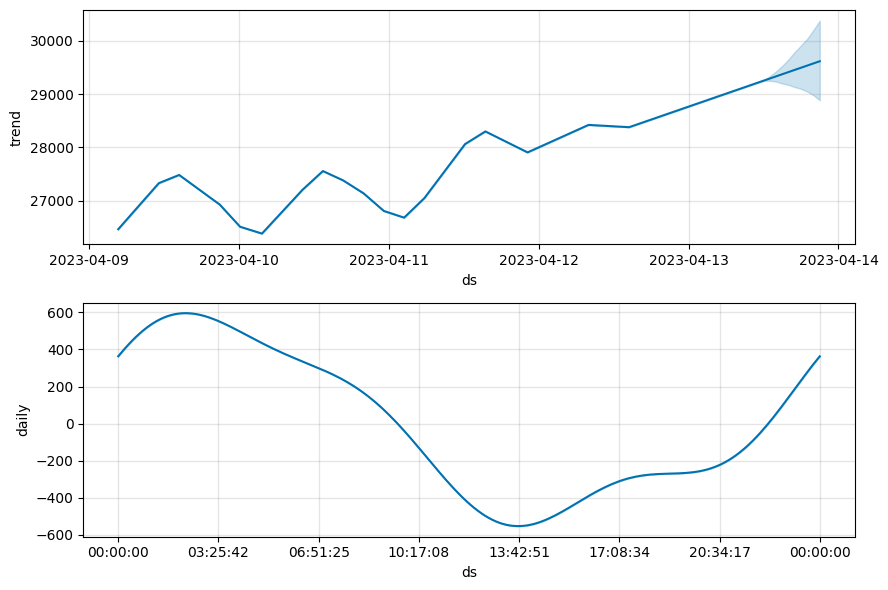

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive


KeyboardInterrupt: ignored